## Introduction 
Hello! This is a research with domain
Study the scalability and effectiveness of different regression methods in the domain of traﬀic management.

Content:<br>
* [1.Load Data](#load)
* [2.Create dataset for our experiments](#dataset)
* [3.Data transformation](#transformation)
* [4.Find the best learning rate for SGDRegressor model](#rate)
* [5.Create functions to scale our dataset and for evaluation](#scaling)
* [6.Functions with statistical tests for comparing algorithms](#tests)
* [7.Create some regression algorithms](#reg_methods)
* [8.Scaling and models comparison with respect to R2 and RMSE](#compare)
   * [8.1 scaling: 0.1% (5714 rows) and r2](#0.1r2)
   * [8.2 scaling: 0.1% (5714 rows) and neg_RMSE](#0.1rmse)
   * [8.3 scaling: 1% (57140 rows) and r2](#1r2)
   * [8.4 scaling: 1% (57140 rows) and neg_RMSE](#1rmse)
   * [8.5 scaling: 10% (571400 rows) and r2](#10r2)
   * [8.6 scaling: 10% (571400 rows) and neg_RMSE](#10rmse)
* [9.Results](#results)
   * [9.1 null hypothesis 1](#hypo1)
   * [9.2 null hypothesis 2](#hypo2)
   * [9.3 null hypothesis 3](#hypo3)
   * [9.4 null hypothesis 4](#hypo4)
   * [9.5 null hypothesis 5](#hypo5)
* [10.Questions & Hypothesiss](#Q&H)


###### Team members: Name (Registration Number):
###### Pitaouli_Eftychia (2022202004019), Kratimenos_Efstathios (2022202004008), Vakouftsis_Athanasios  (2022202004002), Lertas_Giorgos (2022202004010)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 1.Load Data
<a id="load"></a> 

In [2]:
df = pd.read_csv('flights.csv')
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

### 2.Create dataset for our experiments
<a id="dataset"></a> 

In [4]:
#we choose the attributes that we need for our tests
df0=df[['DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT',
        'DEPARTURE_TIME','DEPARTURE_DELAY','ARRIVAL_TIME','ARRIVAL_DELAY']]

df0

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY
0,4,AS,ANC,SEA,2354.0,-11.0,408.0,-22.0
1,4,AA,LAX,PBI,2.0,-8.0,741.0,-9.0
2,4,US,SFO,CLT,18.0,-2.0,811.0,5.0
3,4,AA,LAX,MIA,15.0,-5.0,756.0,-9.0
4,4,AS,SEA,ANC,24.0,-1.0,259.0,-21.0
...,...,...,...,...,...,...,...,...
5819074,4,B6,LAX,BOS,2355.0,-4.0,753.0,-26.0
5819075,4,B6,JFK,PSE,2355.0,-4.0,430.0,-16.0
5819076,4,B6,JFK,SJU,2350.0,-9.0,432.0,-8.0
5819077,4,B6,MCO,SJU,2353.0,-6.0,330.0,-10.0


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DAY_OF_WEEK          int64  
 1   AIRLINE              object 
 2   ORIGIN_AIRPORT       object 
 3   DESTINATION_AIRPORT  object 
 4   DEPARTURE_TIME       float64
 5   DEPARTURE_DELAY      float64
 6   ARRIVAL_TIME         float64
 7   ARRIVAL_DELAY        float64
dtypes: float64(4), int64(1), object(3)
memory usage: 355.2+ MB


In [6]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
DAY_OF_WEEK,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
DEPARTURE_TIME,5732926.0,1335.204439,496.423260,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
ARRIVAL_TIME,5726566.0,1476.491188,526.319737,1.0,1059.0,1512.0,1917.0,2400.0
ARRIVAL_DELAY,5714008.0,4.407057,39.271297,-87.0,-13.0,-5.0,8.0,1971.0


In [7]:
df0.isnull().any()

DAY_OF_WEEK            False
AIRLINE                False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
dtype: bool

In [8]:
print('Number of different origin airports: ',df0.ORIGIN_AIRPORT.nunique())
print('Number of different destination airports: ',df0.DESTINATION_AIRPORT.nunique())

Number of different origin airports:  930
Number of different destination airports:  930


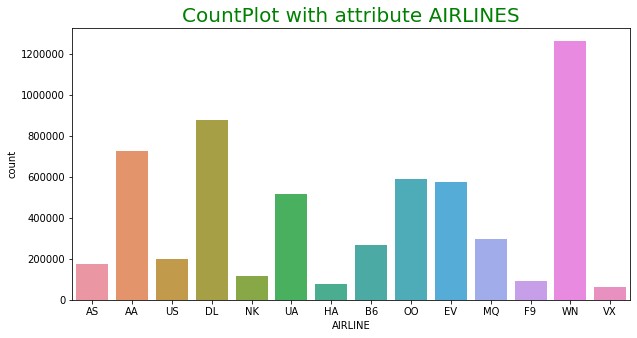

In [9]:
plt.figure(figsize=(10,5))
plt.title("CountPlot with attribute AIRLINES", fontsize=20, color="green")  
sns.countplot(x='AIRLINE',data=df0);

### 3.Data transformation
<a id="transformation"></a> 

In [10]:
#We change string values to numeric for our predictions.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df0['AIRLINE']=le.fit_transform(df0['AIRLINE'])
df0['ORIGIN_AIRPORT']=le.fit_transform(df0['ORIGIN_AIRPORT'].astype('str'))
df0['DESTINATION_AIRPORT']=le.fit_transform(df0['DESTINATION_AIRPORT'].astype('str'))

#And now we drop the rows with nan values.
df0=df0.dropna()
df0

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY
0,4,1,323,584,2354.0,-11.0,408.0,-22.0
1,4,0,482,542,2.0,-8.0,741.0,-9.0
2,4,11,584,373,18.0,-2.0,811.0,5.0
3,4,0,482,510,15.0,-5.0,756.0,-9.0
4,4,1,583,324,24.0,-1.0,259.0,-21.0
...,...,...,...,...,...,...,...,...
5819074,4,2,482,346,2355.0,-4.0,753.0,-26.0
5819075,4,2,472,555,2355.0,-4.0,430.0,-16.0
5819076,4,2,472,592,2350.0,-9.0,432.0,-8.0
5819077,4,2,499,592,2353.0,-6.0,330.0,-10.0


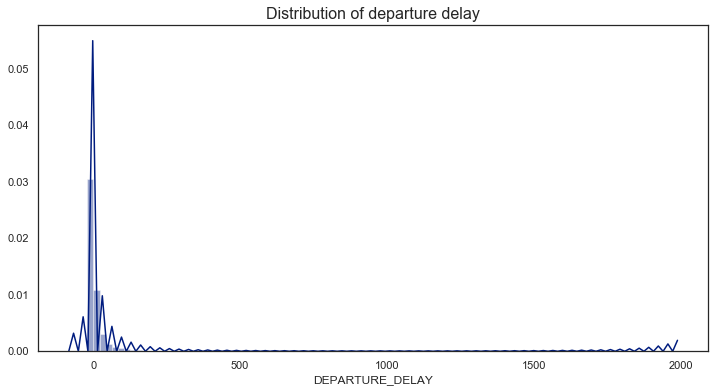

In [11]:
#plot of attribute DEPARTURE_DELAY
sns.set(style="white", palette="dark", color_codes=True)
plt.figure(figsize=(12, 6))
plt.title('Distribution of departure delay', fontsize=16)
sns.distplot(df0['DEPARTURE_DELAY'], bins=100, color='b');

### 4.Find the best learning rate for SGDRegressor model
<a id="rate"></a> 

In [12]:
#function to find the learning rate that we will use for the SGD
from io import StringIO
import sys
from sklearn.linear_model import SGDRegressor

def learn_rate(lr,fX,fy):
    
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    
    sgd = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1, verbose=1)
    
    coef_list=[]; # this holds the coefficient values for first regressor
    epochs = 15 ; # number of epochs
    
    for epoch in range(epochs):
        model = sgd.partial_fit(fX, fy) #create three model for each regressor
        y = model.predict(fX)    #prediction values for each regressor
        coef_list.append(model.coef_.tolist()) #collect tolist the coefficients for each regressor
        
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue() #create value loss history to take the loss from the string
    loss_list = []  #this list collects loss for each regressor

    count = 1   #create count to find loss of each regressor in loss history

    for line in loss_history.split('\n'):   #split to lines loss history
        if(len(line.split("loss: ")) == 1):   #split lines to 'loss: ' and when if equal character we continue 
            continue
        loss_list.append(float(line.split("loss: ")[-1]))
        
    plt.figure(figsize=(12,5))
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.scatter(np.arange(len(loss_list)),loss_list)
    plt.xlabel("Time in epochs")
    plt.ylabel("Loss")
    plt.show()



With  0.1 % instances from the dataset.

Learning rate:  0.001


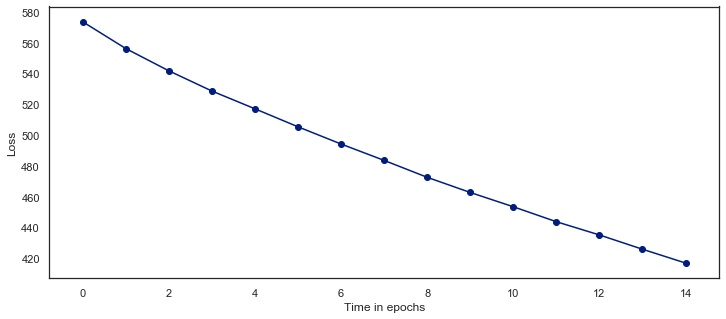

Learning rate:  0.01


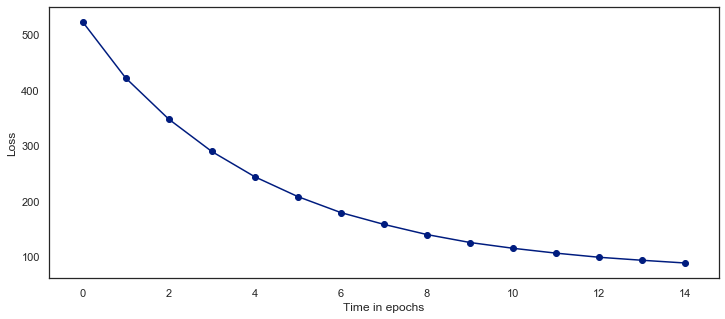

Learning rate:  0.1


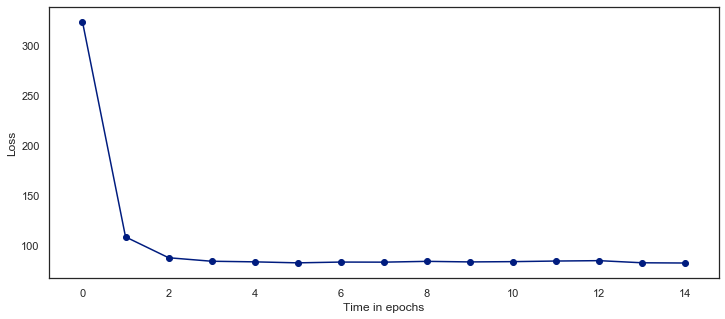



With  1.0 % instances from the dataset.

Learning rate:  0.001


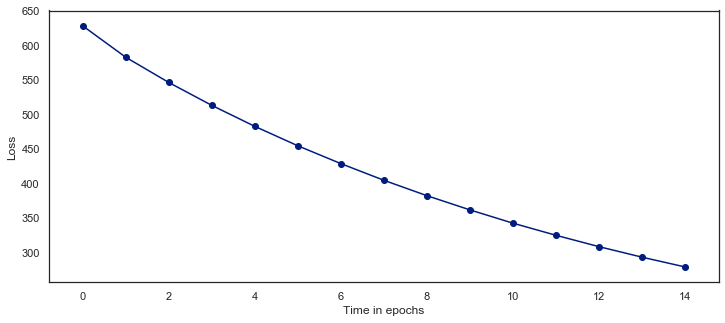

Learning rate:  0.01


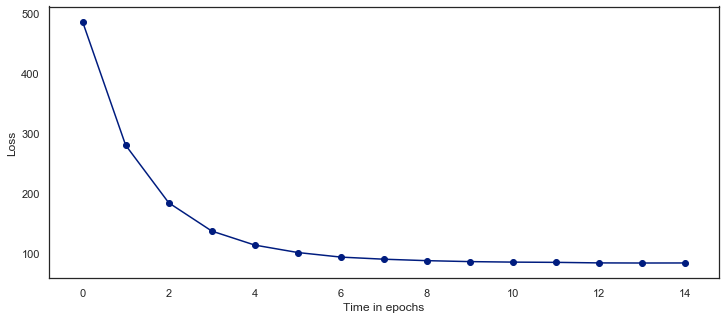

Learning rate:  0.1


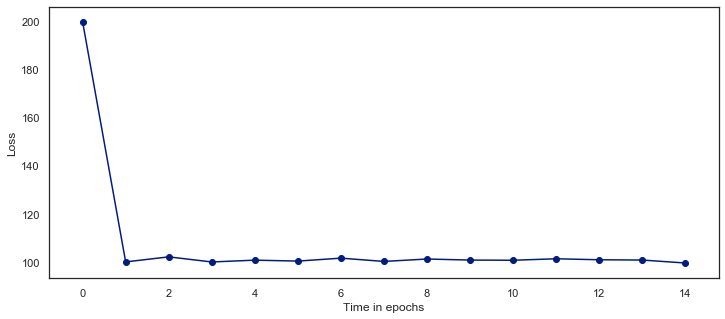



With  10.0 % instances from the dataset.

Learning rate:  0.001


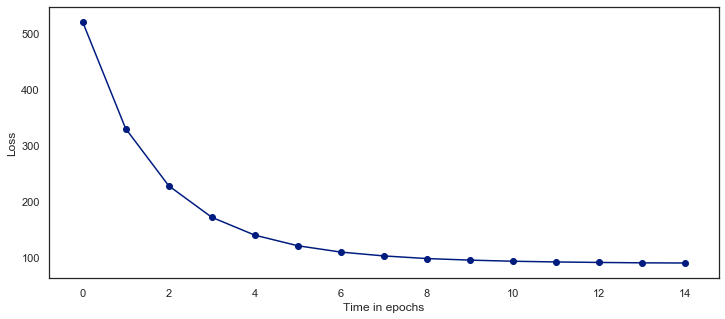

Learning rate:  0.01


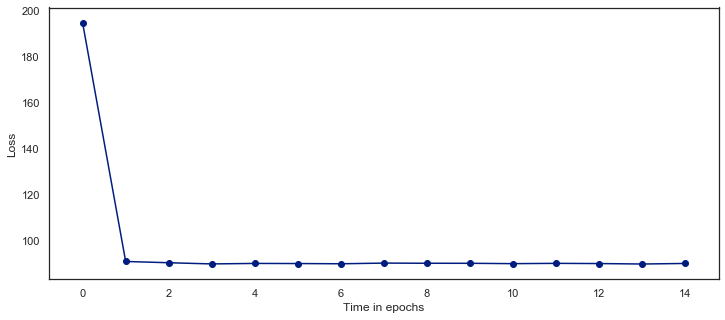

Learning rate:  0.1


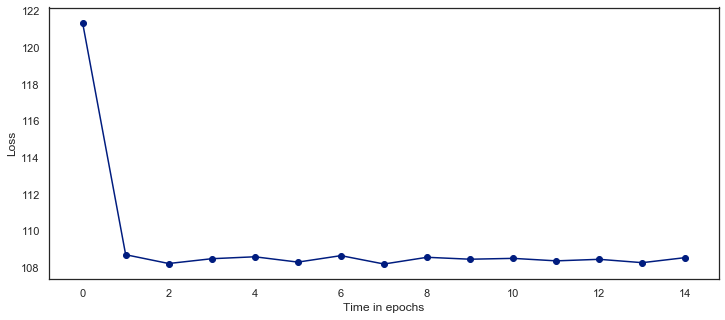

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#function with scaling data to find the best learning rate for each scale
def SGD_scaling(sc):
    #scaled data
    df1=df0.sample(frac=sc, random_state=1)
    
    #Splitting the features in X training variables and target in Y
    X=df1.drop(['DEPARTURE_DELAY'],axis=1)
    y=df1.DEPARTURE_DELAY
    
    #scaling the data for our models
    scaler=MinMaxScaler().fit_transform(X) #scaling to (0,1)
    scal_X=pd.DataFrame(scaler,columns=X.columns)
    # print scaled dataset
    X=scal_X

    fX = X.values
    fy = y.values
    
    for i in [0.001,0.01,0.1]:
        print("Learning rate: ", i)
        learn_rate(i,fX,fy)
        
        
#scaling of data
scaling=[0.001,0.01,0.1]
for i in scaling:
    print('\n\nWith ',i*100,'% instances from the dataset.\n')
    SGD_scaling(i)

Here are the best values for learning rate in each scale [0.001,0.01,0.1] --> [0.1,0.01,0.01] with max_iter-->[5,8,5]

### 5.Create functions to scale our dataset and for evaluation
<a id="scaling"></a> 

In [14]:
def scale(f,score):
    
    #create sampling from dataset
    print('\nWith ',f*100,'% instances from the dataset:')
    df1=df0.sample(frac=f, random_state=10)
    
    #Splitting the features in X training variables and target in Y
    X=df1.drop(['DEPARTURE_DELAY'],axis=1)
    y=df1.DEPARTURE_DELAY
    
    #scaling the data for our models
    scaler=MinMaxScaler().fit_transform(X) #scaling to (0,1)
    scal_X=pd.DataFrame(scaler,columns=X.columns)
    X=scal_X
    
    # call function for evaluation
    results=evaluation(f,X,y,score)   
    
    #boxplot to compare algorithms
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('Regression Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
    if score=='r2':
        print('\n\n')
        #call function with Friedman test to compare all algorithms
        # Null Hypothesis 3
        print('Null Hypothesis 3: All the regression methods (that we use) have equal R2 score.')
        many_sample_tests(results)
    else:
        #call function with Friedman test to compare 2 algorithms
        print('\n\n')
        print('Null Hypothesis 2: Gradient Boosting and Linear Regression have equal RMSE.')
        two_sample_tests(results[0],results[3])
        print('\n\n')
        print('Null Hypothesis 4: Stochastic gradient descent and XGBoost regression have equal RMSE.')
        two_sample_tests(results[2],results[4])

In [15]:
from sklearn import model_selection
import time
import psutil
import platform

def evaluation(f,X,y,score):
    #lists with results
    results = []
    #list with run times in each scale
    t = []
    
    for name, model in models:
        
        #for calculation run time in each model
        start_time = time.time()
        
        #evaluate some models with kfold cross validation
        kfold = model_selection.KFold(n_splits=5, random_state=10)
        cv_results = model_selection.cross_val_score(model, X, y,  cv=kfold, scoring=score)
        results.append(cv_results)
        print("\n\nEvaluation with score ", score, " (std) :")
        print("%s: %.3f (%.3f)\n" % (name, cv_results.mean(), cv_results.std()))
        
        for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1)):
            print(f"Core {i}: {percentage}%")
            
        #print the time that model runs
        run_time=round(time.time() - start_time,3)
        print('---run time: %s seconds ---\n' % (run_time))
        t.append(run_time)
    
    arr=np.array(results)   
    if score=='r2':
        #append times list from each scale in dataframe
        times_r2[str(f*100)+'%']=t
        #append scores list from each scale in dataframe
        scores_r2[str(f*100)+'%']=np.round(np.mean(arr, axis=1),3)
    else:
        #append times list from each scale in dataframe
        times_rmse[str(f*100)+'%']=t
        #append scores list from each scale in dataframe
        scores_rmse[str(f*100)+'%']=np.round(np.mean(arr, axis=1),3)
    return results

### 6.Functions with statistical tests for comparing algorithms
<a id="tests"></a> 

### Selection of alpha
The p-value can be interpreted in the context of a chosen significance level called alpha. A common value for alpha is 5% or 0.05. If the p-value is below the significance level, then the test says there is enough evidence to reject the null hypothesis and that the samples were likely drawn from populations with differing distributions.

p <= alpha: reject H0, different distribution.
p > alpha: fail to reject H0, same distribution.

#### Friedman test for repeated measurements.¶
The Friedman test is a non-parametric statistical test. Similar to the parametric repeated measures ANOVA, it is used to detect differences in treatments across multiple test attempts.  The Friedman test tests the null hypothesis that repeated measurements of the same individuals have the same distribution. It is often used to test for consistency among measurements obtained in different ways. For example, if two measurement techniques are used on the same set of individuals, the Friedman test can be used to determine if the two measurement techniques are consistent.

It ranks the algorithms for each data set separately, the best performing algorithm getting
the rank of 1, the second best rank 2.

#### Kruskal-Wallis H-test test.
The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

#### Analysis of variance (ANOVA)
Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. ANOVA is based on the law of total variance, where the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [16]:
# Friedman test
from numpy.random import seed
from scipy.stats import friedmanchisquare
from scipy import stats
from scipy.stats import f_oneway

def many_sample_tests(results):
    
    # seed the random number generator
    seed(1)
    
    # compare samples with Friedman_test
    print('**Friedman test**')
    stat, p = friedmanchisquare(results[0], results[1], results[2], results[3], results[4])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')
    
    # compare samples with Kruskal
    print('\n')
    print('**Kruskal-Wallis H-test test**')
    stat, p =stats.kruskal(results[0], results[1], results[2], results[3], results[4])    
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')
    
    # compare samples with ANOVA
    print('\n')
    print('**ANOVA**')
    F, p = f_oneway(results[0], results[1], results[2], results[3], results[4])
    print('Statistics=%.3f, p=%.3f' % (F, p))
    # interpret
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')

#### Mann-Whitney U Test
The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.

#### Cohen's d
Cohen's d is an effect size used to indicate the standardised difference between two means. It can be used, for example, to accompany reporting of t-test and ANOVA results. It is also widely used in meta-analysis.
Cohen's d is an appropriate effect size for the comparison between two means.

#### Wilcoxon rank-sum statistic.
The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution. The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample. This test should be used to compare two samples from continuous distributions.

#### Wilcoxon signed-rank test.
The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used to compare two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ. The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

#### Independent two-sample t-test
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [17]:
from scipy.stats import mannwhitneyu
import pingouin as pt
from scipy.stats import ranksums
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind

def two_sample_tests(data1,data2):
    
    # seed the random number generator
    seed(1)
    
    # compare samples with Mann-Whitney U test
    print('**Mann-Whitney U test**')
    stat, p = mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')
    
    # paired sample t-test
    print('\n')
    print("**Cohen's d**")
    stats=pt.ttest(data1,data2, paired=True)
    print(stats)
    
    #Wilcoxon rank-sum statistic
    print('\n')
    print('**Wilcoxon rank-sum statistic**')
    stat, p=ranksums(data1,data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')
    
    #Wilcoxon signed-rank test
    print('\n')
    print('**Wilcoxon signed-rank test**')
    stat, p = wilcoxon(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')
    
    #T-test 
    print('\n')
    print('**T-test**')
    stat, p = ttest_ind(data1,data2,equal_var=False)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > 0.05:
        print('Fail to reject null hypothesis')
    else:
        print('Reject null hypothesis')

### 7.Create some regression algorithms
<a id="reg_methods"></a> 

In [18]:
#create all the algorithms that we will use
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xg
from sklearn.ensemble import GradientBoostingRegressor

LR = LinearRegression()
Rd = Ridge()
xgb = xg.XGBRegressor(n_estimators = 10)
GBR = GradientBoostingRegressor(n_estimators = 100, random_state=0)

#regression for our models 
models=[]
models.append(['Linear',LR])
models.append(['Ridge',Rd])
models.append(['XGBoost',xgb])
models.append(['Gradient Boost',GBR])

# list with names
names=['Linear', 'Ridge', 'XGBoost', 'Gradient Boost', 'Stoch.Grad.Descent']

# list with scales
scales=['0.1%', '1.0%', '10.0%']

# dataframe with times that models run in scaling
times_r2 = pd.DataFrame(columns=scales)

# dataframe with times that models run in scaling
times_rmse = pd.DataFrame(columns=scales)

# dataframe with times that models run in scaling
scores_r2 = pd.DataFrame(columns=scales)

# dataframe with times that models run in scaling
scores_rmse = pd.DataFrame(columns=scales)

### 8.Scaling and models comparison with respect to R2 and RMSE
<a id="compare"></a> 

R2 :: Let us take a naive approach by taking an average of all the points by thinking of a horizontal line through them. Then we can calculate the MSE for this simple model. R2 score answers the question that if this simple model has a larger error than the linear regression model. However, it terms of metrics the answer we need is how much larger. The R2 score answers this question. R2 score is 1 — (Error from Linear Regression Model/Simple average model). 

R squared is used for evaluating predictions on departure delay of the flight which is a regression machine learning problem. R Squared metric provides an indication of the goodness of fit of a set of predictions to the actual values. The value of R Squared will be between 0 and 1, 0 being no fit and 1 being perfect fit.

##### 8.1 scaling: 0.1% (5714 rows) and r2
<a id="0.1r2"></a> 


With  0.1 % instances from the dataset:


Evaluation with score  r2  (std) :
Linear: 0.883 (0.016)

Core 0: 30.0%
Core 1: 7.9%
Core 2: 27.7%
Core 3: 6.0%
---run time: 1.028 seconds ---



Evaluation with score  r2  (std) :
Ridge: 0.881 (0.013)

Core 0: 46.0%
Core 1: 13.9%
Core 2: 38.0%
Core 3: 12.0%
---run time: 1.034 seconds ---



Evaluation with score  r2  (std) :
XGBoost: 0.910 (0.015)

Core 0: 56.4%
Core 1: 31.3%
Core 2: 52.5%
Core 3: 29.0%
---run time: 1.203 seconds ---



Evaluation with score  r2  (std) :
Gradient Boost: 0.918 (0.012)

Core 0: 54.5%
Core 1: 18.0%
Core 2: 50.0%
Core 3: 15.8%
---run time: 3.664 seconds ---

-- Epoch 1
Norm: 426.85, NNZs: 7, Bias: -37.507837, T: 4571, Avg. loss: 269.956436
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 497.23, NNZs: 7, Bias: -46.418158, T: 9142, Avg. loss: 94.283916
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 511.21, NNZs: 7, Bias: -47.727538, T: 13713, Avg. loss: 85.655416
Total training time: 0.00 seconds.
-- Epoch

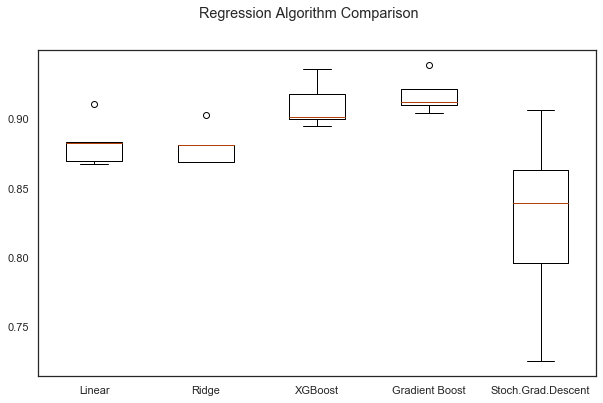




Null Hypothesis 3: All the regression methods (that we use) have equal R2 score.
**Friedman test**
Statistics=18.560, p=0.001
Reject null hypothesis


**Kruskal-Wallis H-test test**
Statistics=14.282, p=0.006
Reject null hypothesis


**ANOVA**
Statistics=5.639, p=0.003
Reject null hypothesis


In [19]:
#create and append the new sgd with new lr
SGD = SGDRegressor(learning_rate='constant', eta0=0.1, max_iter=5, verbose=1)
models.append(['Stoch.Grad.Descent',SGD])

#scaling number and score to evaluate models
scale(0.001,'r2')

##### 8.2 scaling: 0.1% (5714 rows) and neg_RMSE
<a id="0.1rmse"></a> 


With  0.1 % instances from the dataset:


Evaluation with score  neg_root_mean_squared_error  (std) :
Linear: -11.771 (0.396)

Core 0: 52.5%
Core 1: 21.0%
Core 2: 47.0%
Core 3: 20.0%
---run time: 1.029 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
Ridge: -11.913 (0.583)

Core 0: 60.0%
Core 1: 21.8%
Core 2: 56.0%
Core 3: 15.2%
---run time: 1.03 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
XGBoost: -10.284 (0.522)

Core 0: 37.0%
Core 1: 19.8%
Core 2: 33.0%
Core 3: 18.2%
---run time: 1.237 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
Gradient Boost: -9.869 (0.456)

Core 0: 55.4%
Core 1: 24.5%
Core 2: 53.0%
Core 3: 18.0%
---run time: 3.463 seconds ---

-- Epoch 1
Norm: 428.64, NNZs: 7, Bias: -28.517188, T: 4571, Avg. loss: 270.814057
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 502.72, NNZs: 7, Bias: -49.589270, T: 9142, Avg. loss: 92.918787
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5

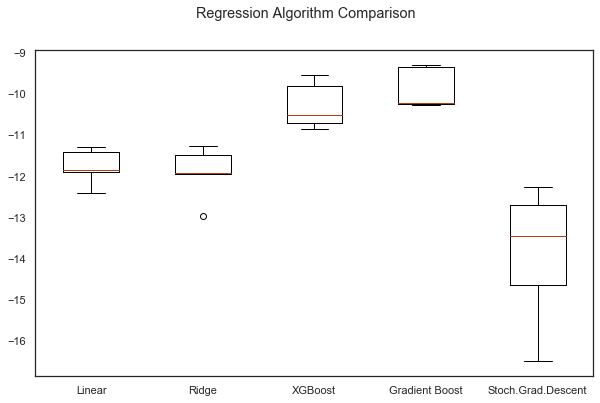




Null Hypothesis 2: Gradient Boosting and Linear Regression have equal RMSE.
**Mann-Whitney U test**
Statistics=0.000, p=0.006
Reject null hypothesis


**Cohen's d**
                T  dof       tail     p-val          CI95%   cohen-d     BF10  \
T-test -17.978809    4  two-sided  0.000056  [-2.2, -1.61]  3.985258  315.159   

           power  
T-test  0.999989  


**Wilcoxon rank-sum statistic**
Statistics=-2.611, p=0.009
Reject null hypothesis


**Wilcoxon signed-rank test**
Statistics=0.000, p=0.043
Reject null hypothesis


**T-test**
Statistics=-6.301, p=0.000
Reject null hypothesis



Null Hypothesis 4: Stochastic gradient descent and XGBoost regression have equal RMSE.
**Mann-Whitney U test**
Statistics=0.000, p=0.006
Reject null hypothesis


**Cohen's d**
               T  dof       tail     p-val         CI95%   cohen-d   BF10  \
T-test  3.703651    4  two-sided  0.020769  [0.91, 6.35]  2.837158  4.161   

           power  
T-test  0.995223  


**Wilcoxon rank-sum statistic

In [20]:
#delete the last model, which is sgd
del models[-1]

#create and append the new sgd with new lr
SGD = SGDRegressor(learning_rate='constant', eta0=0.1, max_iter=5, verbose=1)
models.append(['Stoch.Grad.Descent',SGD])

#scaling number and score to evaluate models
scale(0.001,'neg_root_mean_squared_error')

In [21]:
#input to indices the names of models 
times_r2.index=names
times_rmse.index=names
scores_r2.index=names
scores_rmse.index=names

##### 8.3 scaling: 1% (57140 rows) and r2
<a id="1r2"></a> 


With  1.0 % instances from the dataset:


Evaluation with score  r2  (std) :
Linear: 0.886 (0.003)

Core 0: 44.6%
Core 1: 21.0%
Core 2: 46.5%
Core 3: 17.8%
---run time: 1.049 seconds ---



Evaluation with score  r2  (std) :
Ridge: 0.886 (0.003)

Core 0: 50.0%
Core 1: 20.0%
Core 2: 44.0%
Core 3: 16.0%
---run time: 1.045 seconds ---



Evaluation with score  r2  (std) :
XGBoost: 0.922 (0.004)

Core 0: 50.0%
Core 1: 22.0%
Core 2: 44.0%
Core 3: 23.8%
---run time: 2.289 seconds ---



Evaluation with score  r2  (std) :
Gradient Boost: 0.924 (0.003)

Core 0: 29.7%
Core 1: 7.0%
Core 2: 23.0%
Core 3: 5.0%
---run time: 23.143 seconds ---

-- Epoch 1
Norm: 359.57, NNZs: 7, Bias: -22.056764, T: 45712, Avg. loss: 468.477562
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 589.98, NNZs: 7, Bias: -30.354567, T: 91424, Avg. loss: 264.091658
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 740.28, NNZs: 7, Bias: -37.278824, T: 137136, Avg. loss: 171.362411
Total training time: 0.01 seconds.
--

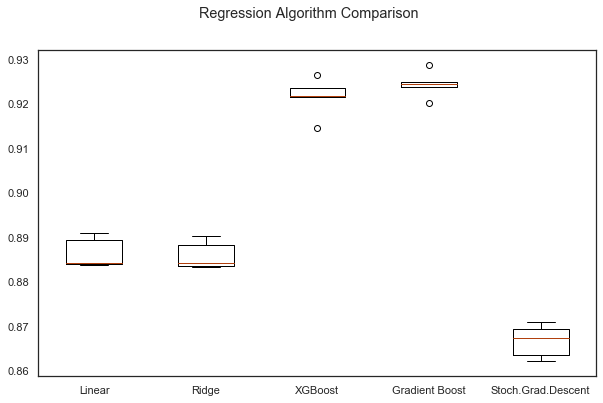




Null Hypothesis 3: All the regression methods (that we use) have equal R2 score.
**Friedman test**
Statistics=19.360, p=0.001
Reject null hypothesis


**Kruskal-Wallis H-test test**
Statistics=21.083, p=0.000
Reject null hypothesis


**ANOVA**
Statistics=242.727, p=0.000
Reject null hypothesis


In [22]:
#delete the last model, which is sgd
del models[-1]

#create and append the new sgd with new lr
SGD = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=8, verbose=1)
models.append(['Stoch.Grad.Descent',SGD])

#scaling number and score to evaluate models
scale(0.01,'r2')

##### 8.4 scaling: 1% (57140 rows) and neg_RMSE
<a id="1rmse"></a> 


With  1.0 % instances from the dataset:


Evaluation with score  neg_root_mean_squared_error  (std) :
Linear: -12.077 (0.055)

Core 0: 51.5%
Core 1: 25.0%
Core 2: 45.0%
Core 3: 21.8%
---run time: 1.165 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
Ridge: -12.107 (0.068)

Core 0: 17.0%
Core 1: 6.0%
Core 2: 17.0%
Core 3: 4.0%
---run time: 1.045 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
XGBoost: -10.036 (0.370)

Core 0: 29.4%
Core 1: 16.2%
Core 2: 23.0%
Core 3: 15.8%
---run time: 1.905 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
Gradient Boost: -9.855 (0.282)

Core 0: 55.6%
Core 1: 17.2%
Core 2: 40.6%
Core 3: 14.0%
---run time: 23.498 seconds ---

-- Epoch 1
Norm: 359.57, NNZs: 7, Bias: -22.056764, T: 45712, Avg. loss: 468.477562
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 589.98, NNZs: 7, Bias: -30.354567, T: 91424, Avg. loss: 264.091658
Total training time: 0.01 seconds.
-- Epoch 3
Norm

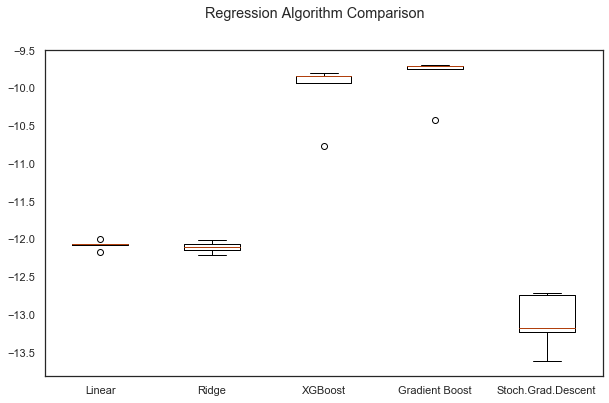




Null Hypothesis 2: Gradient Boosting and Linear Regression have equal RMSE.
**Mann-Whitney U test**
Statistics=0.000, p=0.006
Reject null hypothesis


**Cohen's d**
                T  dof       tail     p-val           CI95%   cohen-d  \
T-test -18.716491    4  two-sided  0.000048  [-2.55, -1.89]  9.790228   

           BF10  power  
T-test  354.774    1.0  


**Wilcoxon rank-sum statistic**
Statistics=-2.611, p=0.009
Reject null hypothesis


**Wilcoxon signed-rank test**
Statistics=0.000, p=0.043
Reject null hypothesis


**T-test**
Statistics=-15.480, p=0.000
Reject null hypothesis



Null Hypothesis 4: Stochastic gradient descent and XGBoost regression have equal RMSE.
**Mann-Whitney U test**
Statistics=0.000, p=0.006
Reject null hypothesis


**Cohen's d**
                T  dof       tail     p-val         CI95%   cohen-d      BF10  \
T-test  28.459207    4  two-sided  0.000009  [2.76, 3.36]  7.706898  1227.671   

        power  
T-test    1.0  


**Wilcoxon rank-sum statistic*

In [23]:
#delete the last model, which is sgd
del models[-1]

#create and append the new sgd with new lr
SGD = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=8, verbose=1)
models.append(['Stoch.Grad.Descent',SGD])

#scaling number and score to evaluate models
scale(0.01,'neg_root_mean_squared_error')

##### 8.5 scaling: 10% (571400 rows) and r2
<a id="10r2"></a> 


With  10.0 % instances from the dataset:


Evaluation with score  r2  (std) :
Linear: 0.892 (0.004)

Core 0: 64.4%
Core 1: 29.7%
Core 2: 60.4%
Core 3: 25.5%
---run time: 1.565 seconds ---



Evaluation with score  r2  (std) :
Ridge: 0.892 (0.004)

Core 0: 42.2%
Core 1: 12.0%
Core 2: 40.2%
Core 3: 10.0%
---run time: 1.424 seconds ---



Evaluation with score  r2  (std) :
XGBoost: 0.930 (0.003)

Core 0: 53.0%
Core 1: 25.0%
Core 2: 44.6%
Core 3: 22.8%
---run time: 13.264 seconds ---



Evaluation with score  r2  (std) :
Gradient Boost: 0.931 (0.003)

Core 0: 18.0%
Core 1: 2.0%
Core 2: 14.9%
Core 3: 2.0%
---run time: 256.559 seconds ---

-- Epoch 1
Norm: 1182.10, NNZs: 7, Bias: -56.144221, T: 457120, Avg. loss: 214.432271
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 1250.12, NNZs: 7, Bias: -57.434274, T: 914240, Avg. loss: 92.152313
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 1240.78, NNZs: 7, Bias: -57.581568, T: 1371360, Avg. loss: 88.475373
Total training time: 0.22 seco

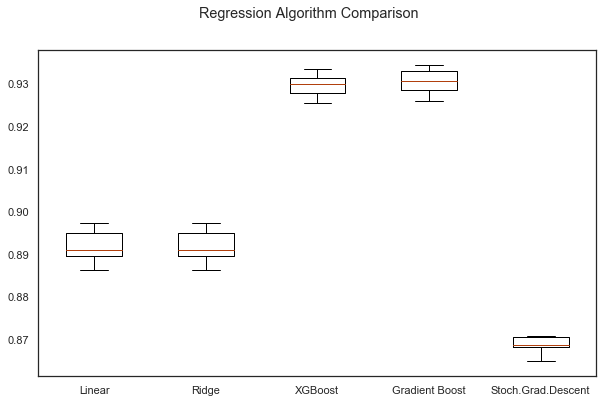




Null Hypothesis 3: All the regression methods (that we use) have equal R2 score.
**Friedman test**
Statistics=19.040, p=0.001
Reject null hypothesis


**Kruskal-Wallis H-test test**
Statistics=20.817, p=0.000
Reject null hypothesis


**ANOVA**
Statistics=278.652, p=0.000
Reject null hypothesis


In [24]:
#delete the last model, which is sgd
del models[-1]

#create and append the new sgd with new lr
SGD = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=5, verbose=1)
models.append(['Stoch.Grad.Descent',SGD])

#scaling number and score to evaluate models
scale(0.1,'r2')

##### 8.6 scaling: 10% (571400 rows) and neg_RMSE
<a id="10rmse"></a> 


With  10.0 % instances from the dataset:


Evaluation with score  neg_root_mean_squared_error  (std) :
Linear: -12.070 (0.069)

Core 0: 16.8%
Core 1: 3.9%
Core 2: 17.0%
Core 3: 3.0%
---run time: 1.441 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
Ridge: -12.071 (0.068)

Core 0: 10.9%
Core 1: 4.0%
Core 2: 8.0%
Core 3: 2.0%
---run time: 1.256 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
XGBoost: -9.733 (0.089)

Core 0: 21.0%
Core 1: 14.9%
Core 2: 18.0%
Core 3: 13.1%
---run time: 9.69 seconds ---



Evaluation with score  neg_root_mean_squared_error  (std) :
Gradient Boost: -9.672 (0.094)

Core 0: 39.6%
Core 1: 12.0%
Core 2: 33.3%
Core 3: 9.9%
---run time: 256.049 seconds ---

-- Epoch 1
Norm: 1182.10, NNZs: 7, Bias: -56.144221, T: 457120, Avg. loss: 214.432271
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 1250.12, NNZs: 7, Bias: -57.434274, T: 914240, Avg. loss: 92.152313
Total training time: 0.15 seconds.
-- Epoch 3
Norm:

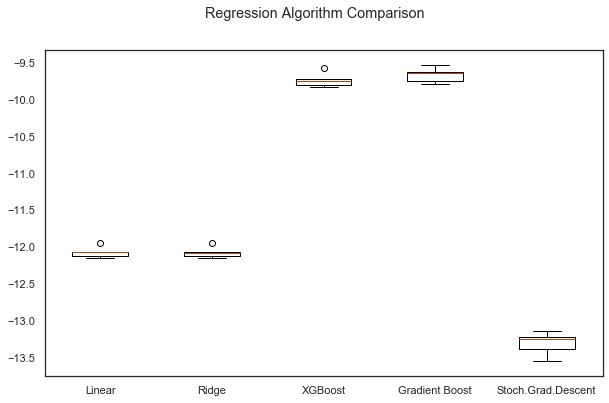




Null Hypothesis 2: Gradient Boosting and Linear Regression have equal RMSE.
**Mann-Whitney U test**
Statistics=0.000, p=0.006
Reject null hypothesis


**Cohen's d**
                 T  dof       tail         p-val           CI95%    cohen-d  \
T-test -147.923846    4  two-sided  1.252755e-08  [-2.44, -2.35]  26.127986   

             BF10  power  
T-test  1.702e+05    1.0  


**Wilcoxon rank-sum statistic**
Statistics=-2.611, p=0.009
Reject null hypothesis


**Wilcoxon signed-rank test**
Statistics=0.000, p=0.043
Reject null hypothesis


**T-test**
Statistics=-41.312, p=0.000
Reject null hypothesis



Null Hypothesis 4: Stochastic gradient descent and XGBoost regression have equal RMSE.
**Mann-Whitney U test**
Statistics=0.000, p=0.006
Reject null hypothesis


**Cohen's d**
                T  dof       tail     p-val         CI95%    cohen-d  \
T-test  46.323279    4  two-sided  0.000001  [3.36, 3.79]  26.512092   

            BF10  power  
T-test  5251.764    1.0  


**Wilcoxon r

In [25]:
#delete the last model, which is sgd
del models[-1]

#create and append the new sgd with new lr
SGD = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=5, verbose=1)
models.append(['Stoch.Grad.Descent',SGD])

#scaling number and score to evaluate models
scale(0.1,'neg_root_mean_squared_error')

### 9.Results
<a id="results"></a> 

#### 9.1 null hypothesis 1
<a id="hypo1"></a> 

In [26]:
times_r2

,0.1%,1.0%,10.0%
Linear,1.028,1.049,1.565
Ridge,1.034,1.045,1.424
XGBoost,1.203,2.289,13.264
Gradient Boost,3.664,23.143,256.559
Stoch.Grad.Descent,1.047,1.185,2.647


In [27]:
times_r2['0.1%']['Gradient Boost']==times_r2['1.0%']['Gradient Boost']==times_r2['10.0%']['Gradient Boost']

False

In [28]:
times_rmse

,0.1%,1.0%,10.0%
Linear,1.029,1.165,1.441
Ridge,1.030,1.045,1.256
XGBoost,1.237,1.905,9.690
Gradient Boost,3.463,23.498,256.049
Stoch.Grad.Descent,1.041,1.201,3.083


In [29]:
times_rmse['0.1%']['XGBoost']==times_rmse['1.0%']['XGBoost']==times_rmse['10.0%']['XGBoost']

False

#### 9.2 null hypothesis 2
<a id="hypo2"></a> 

In [30]:
scores_rmse

,0.1%,1.0%,10.0%
Linear,-11.771,-12.077,-12.070
Ridge,-11.913,-12.107,-12.071
XGBoost,-10.284,-10.036,-9.733
Gradient Boost,-9.869,-9.855,-9.672
Stoch.Grad.Descent,-13.911,-13.093,-13.306


#### 9.3 null hypothesis 3
<a id="hypo3"></a> 

In [31]:
scores_r2

,0.1%,1.0%,10.0%
Linear,0.883,0.886,0.892
Ridge,0.881,0.886,0.892
XGBoost,0.910,0.922,0.930
Gradient Boost,0.918,0.924,0.931
Stoch.Grad.Descent,0.826,0.867,0.869


#### 9.4 null hypothesis 4
<a id="hypo4"></a> 

In [32]:
scores_rmse

,0.1%,1.0%,10.0%
Linear,-11.771,-12.077,-12.070
Ridge,-11.913,-12.107,-12.071
XGBoost,-10.284,-10.036,-9.733
Gradient Boost,-9.869,-9.855,-9.672
Stoch.Grad.Descent,-13.911,-13.093,-13.306


#### 9.5 null hypothesis 5
<a id="hypo5"></a> 

In [33]:
scores_r2

,0.1%,1.0%,10.0%
Linear,0.883,0.886,0.892
Ridge,0.881,0.886,0.892
XGBoost,0.910,0.922,0.930
Gradient Boost,0.918,0.924,0.931
Stoch.Grad.Descent,0.826,0.867,0.869


### 10.Questions & Hypothesis
<a id="Q&H"></a> 